In [295]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager

##### To calculate the normal Angles across the Blade, a set of data set was recorded using the laser profiler 

In [296]:
df = pd.read_csv('../data/measuredAngles.csv')
df.head(9)

,Blade No.,Measured Angles
0,1,1.780078
1,2,1.909625
2,3,1.714951
3,4,1.797712
4,5,1.750724
5,6,2.028946
6,7,1.882012
7,8,1.710417
8,9,2.008980


##### The Mean and Standard Deviation for the Measured angles as follow 

In [297]:
df['Measured Angles'].std()

0.12071895944403267

In [298]:
df['Measured Angles'].mean()

1.842605

In [299]:
data_points = 8

In [300]:
df.index

RangeIndex(start=0, stop=9, step=1)

In [301]:
colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60])

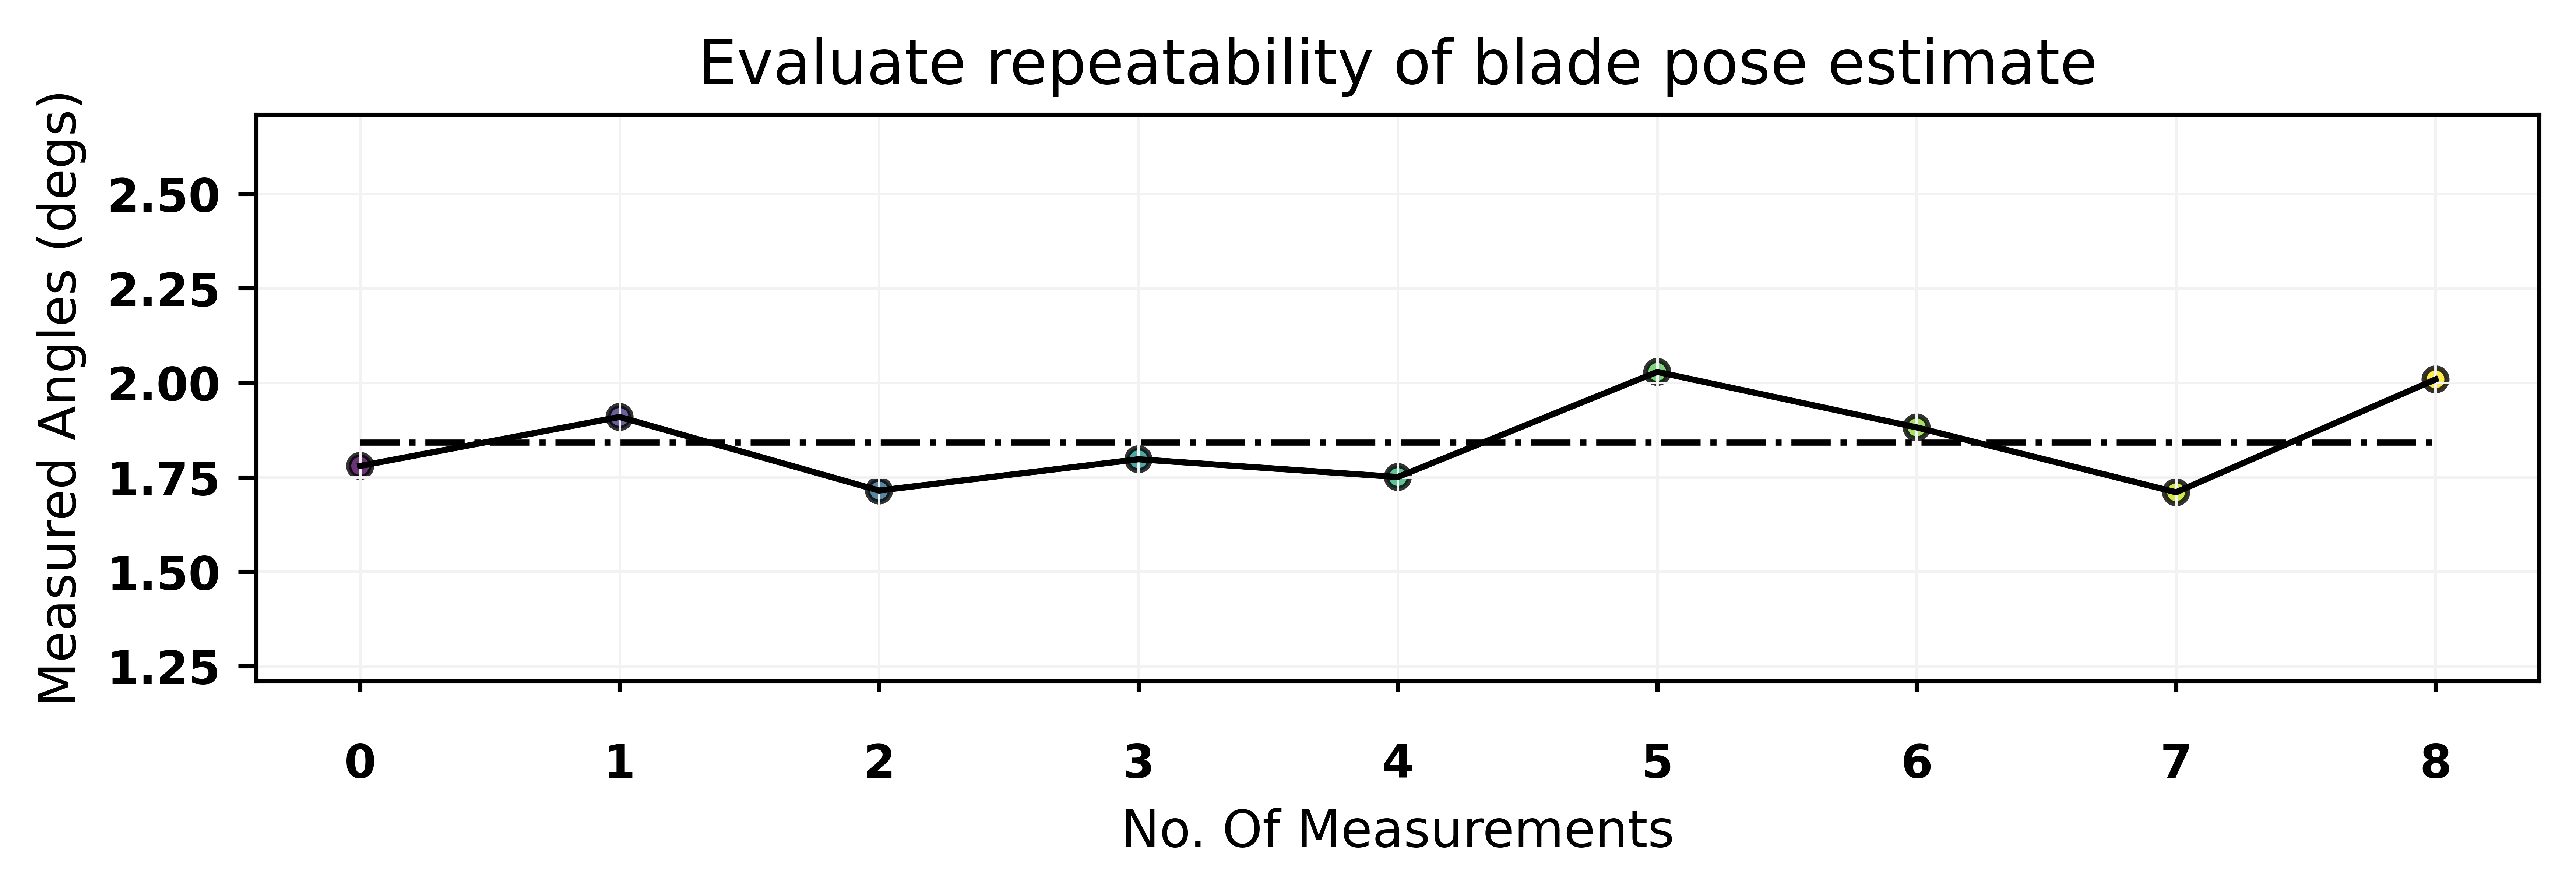

In [302]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})
x=df.index 
y=df['Measured Angles']
plt.figure(figsize=(8,2),dpi=1000)
plt.title("Evaluate repeatability of blade pose estimate") # Title
plt.ylim(df['Measured Angles'].min()-0.5,df['Measured Angles'].min()+ 1) # Setting y limits
plt.scatter(x,y, s=20,c=colors,cmap = 'viridis',marker="o",alpha=0.8,edgecolors='Black'); # Plotting scatter
plt.plot(x,y,ls='-',c='black')
plt.hlines(y=df['Measured Angles'].mean(), xmin=0, xmax=data_points,colors='Black',linestyles='dashdot') # Mean
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("Measured Angles (degs)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')

#### Measuring the offset distance between the refrance blade, which is the first one to be recorded, and each other blade with respect to the refrence one 

In [303]:
df2 = pd.read_csv("../data/offsetCalc.csv")
df2.head()

,Offset Calculation
0,0.000011
1,0.000008
2,0.000004
3,0.000010
4,0.000006


In [304]:
df2['Offset Calculation']= df2['Offset Calculation'] * 1000

In [305]:
df2.head(10)

,Offset Calculation
0,0.011
1,0.008
2,0.004
3,0.010
4,0.006
5,0.020
6,-0.034
7,-0.091


##### The Mean and standard divation for the distance as follow 

In [306]:
df2['Offset Calculation'].mean()


-0.00825

In [307]:
df2['Offset Calculation'].std()

0.037089659706485

In [308]:
df2.shape

(8, 1)

In [309]:
correctedDf = pd.read_csv("../data/offsetCalcCorrected.csv")
correctedDf.head()

,Offset Calculation
0,-0.000004
1,0.000034
2,0.000055
3,-0.000026
4,0.000053


In [310]:
correctedDf['Offset Calculation']= correctedDf['Offset Calculation'] * 1000
correctedDf.head(10)

,Offset Calculation
0,-0.004
1,0.034
2,0.055
3,-0.026
4,0.053
5,-0.011
6,0.040
7,0.126


In [311]:
correctedDf['Offset Calculation'].mean()

0.033375

In [312]:
correctedDf['Offset Calculation'].std()

0.0483556393520224

In [313]:
# The Centriod of blade No.1: x = 0.00683499, y = -0.781808, z =0.860413
# Model coefficients: -0.0129532 0.0282163 0.999518 -5.20327e-05

z = -1 * ( (0.00683499 * -0.0129532) + (-0.781808 * 0.0282163) + -5.20327e-05)/(0.999518)
z

0.022211002466056638

In [314]:
colors = np.array([0, 10, 20, 30, 40, 45, 50,60])

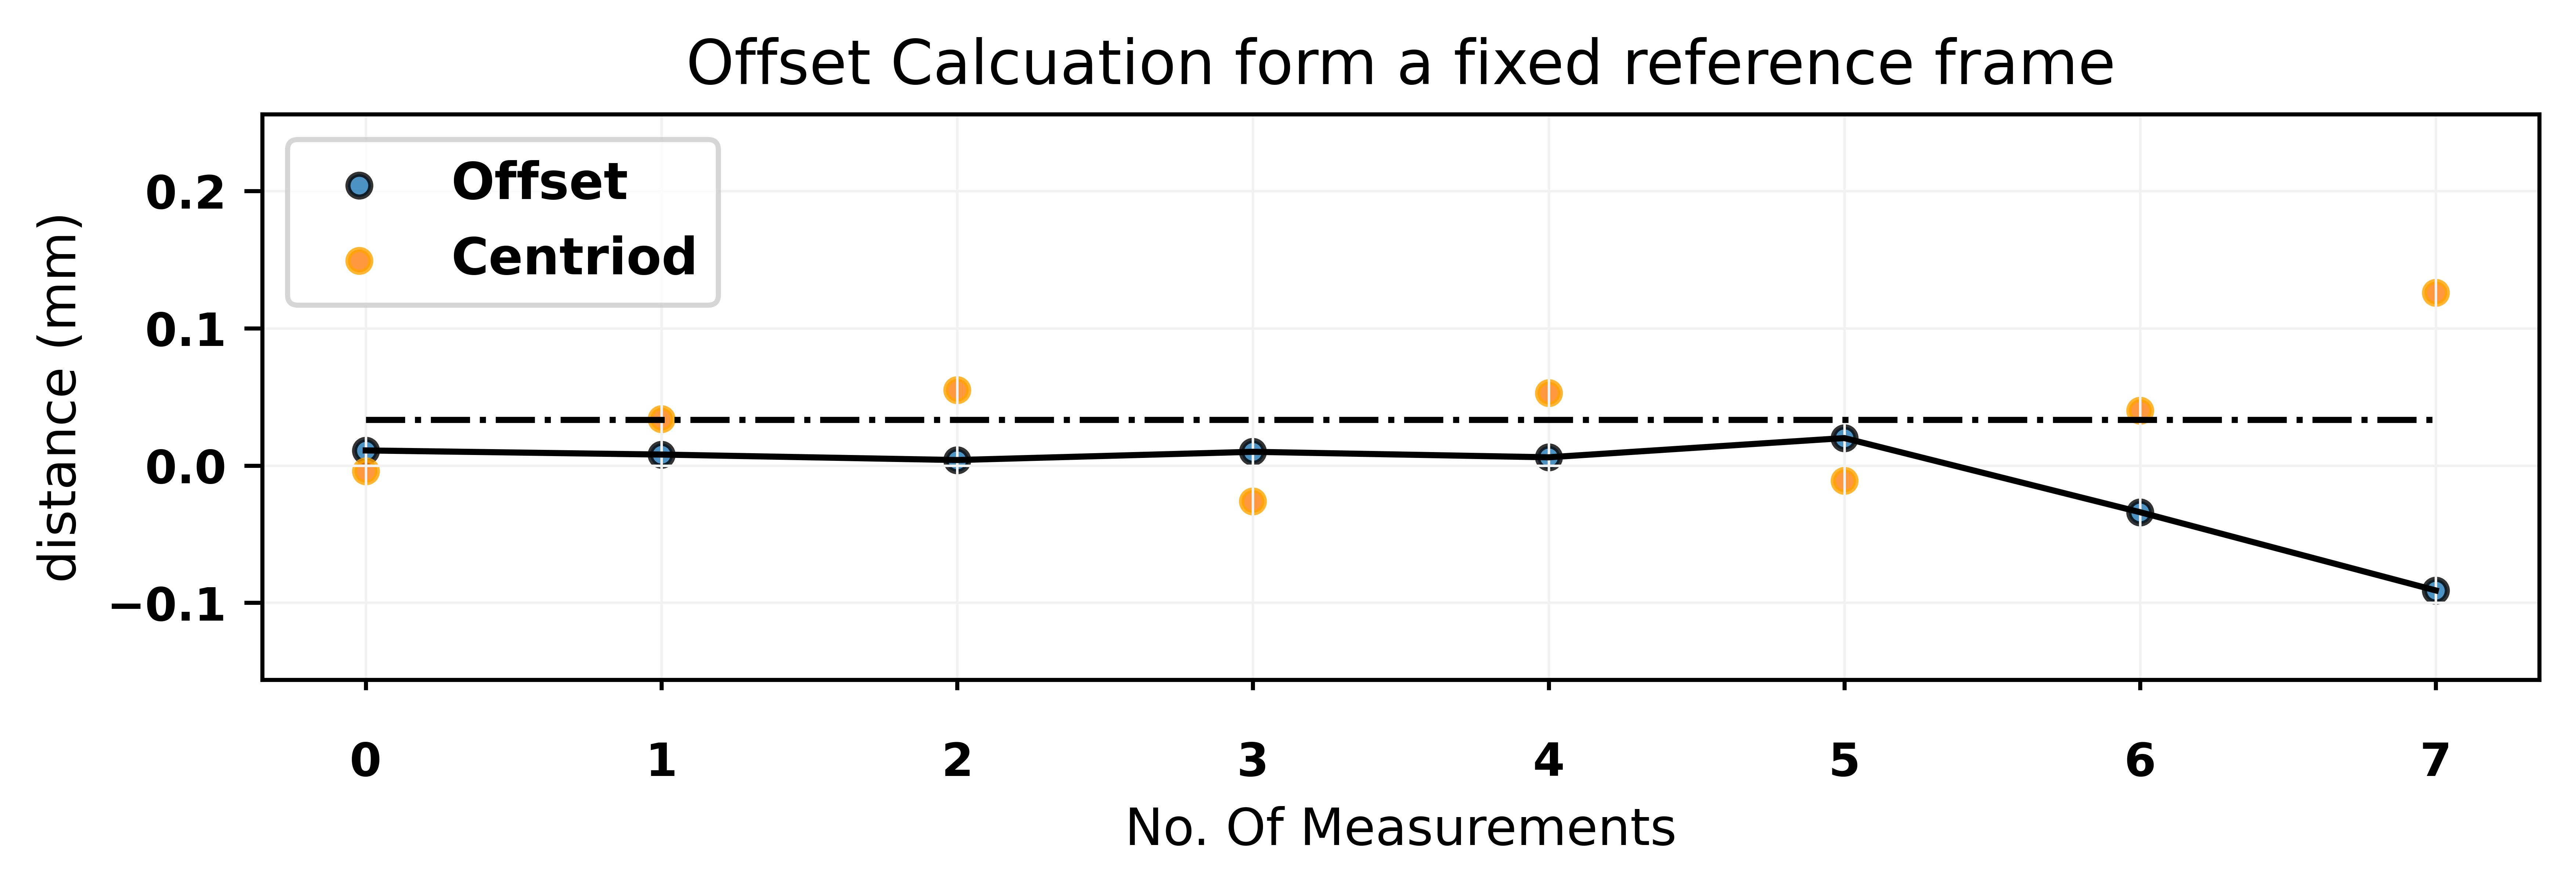

In [315]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})
x=df2.index 
y=df2['Offset Calculation']
y1 = correctedDf['Offset Calculation']
plt.figure(figsize=(8,2),dpi=1000)
plt.title("Offset Calcuation form a fixed reference frame") # Title
plt.ylim(correctedDf['Offset Calculation'].min() -0.13 ,correctedDf['Offset Calculation'].max()+ 0.13) # Setting y limits
plt.scatter(x,y, s=20,marker="o",alpha=0.8,edgecolors='Black',label="Not Corrected"); # Plotting scatter
plt.scatter(x, y1, s=20, marker="o", alpha=0.8, edgecolors='Orange', label="Corrected")
plt.hlines(y=correctedDf['Offset Calculation'].mean(),xmin=0, xmax=7,colors='Black',linestyles='dashdot') # Mean
plt.plot(x, y,ls='-',c='Black')
plt.plot(x, y1, ls='-', c='Orange')
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("distance (mm)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.show()

In [316]:
rotAnglesDf = pd.read_csv("/home/jeo/ku/pcl_filteration/data/rotAngles.csv")
rotAnglesDf.head()

,Roll,Pitch,Yaw
0,-1.617027,0.742245,0.0
1,-1.782409,0.682793,0.0
2,-1.558556,0.713570,-0.0
3,-1.646396,0.719792,0.0
4,-1.609889,0.685841,-0.0


#### To calculete The Mean of values for the each Rotation Angles (Roll, Pitch , Yaw)

In [317]:
rotAnglesDf['Roll'].mean()


-1.7003843333333333

In [318]:
rotAnglesDf['Pitch'].mean()

0.704937

In [319]:
rotAnglesDf['Yaw'].mean()

0.0

### Calcuate The Standard deviation for those Angles 

In [320]:
rotAnglesDf['Roll'].std()

0.13529559963649962

In [321]:
rotAnglesDf['Pitch'].std()

0.021205448521547484

In [322]:
rotAnglesDf['Yaw'].std()

0.0

### Plot the Roll Angles 

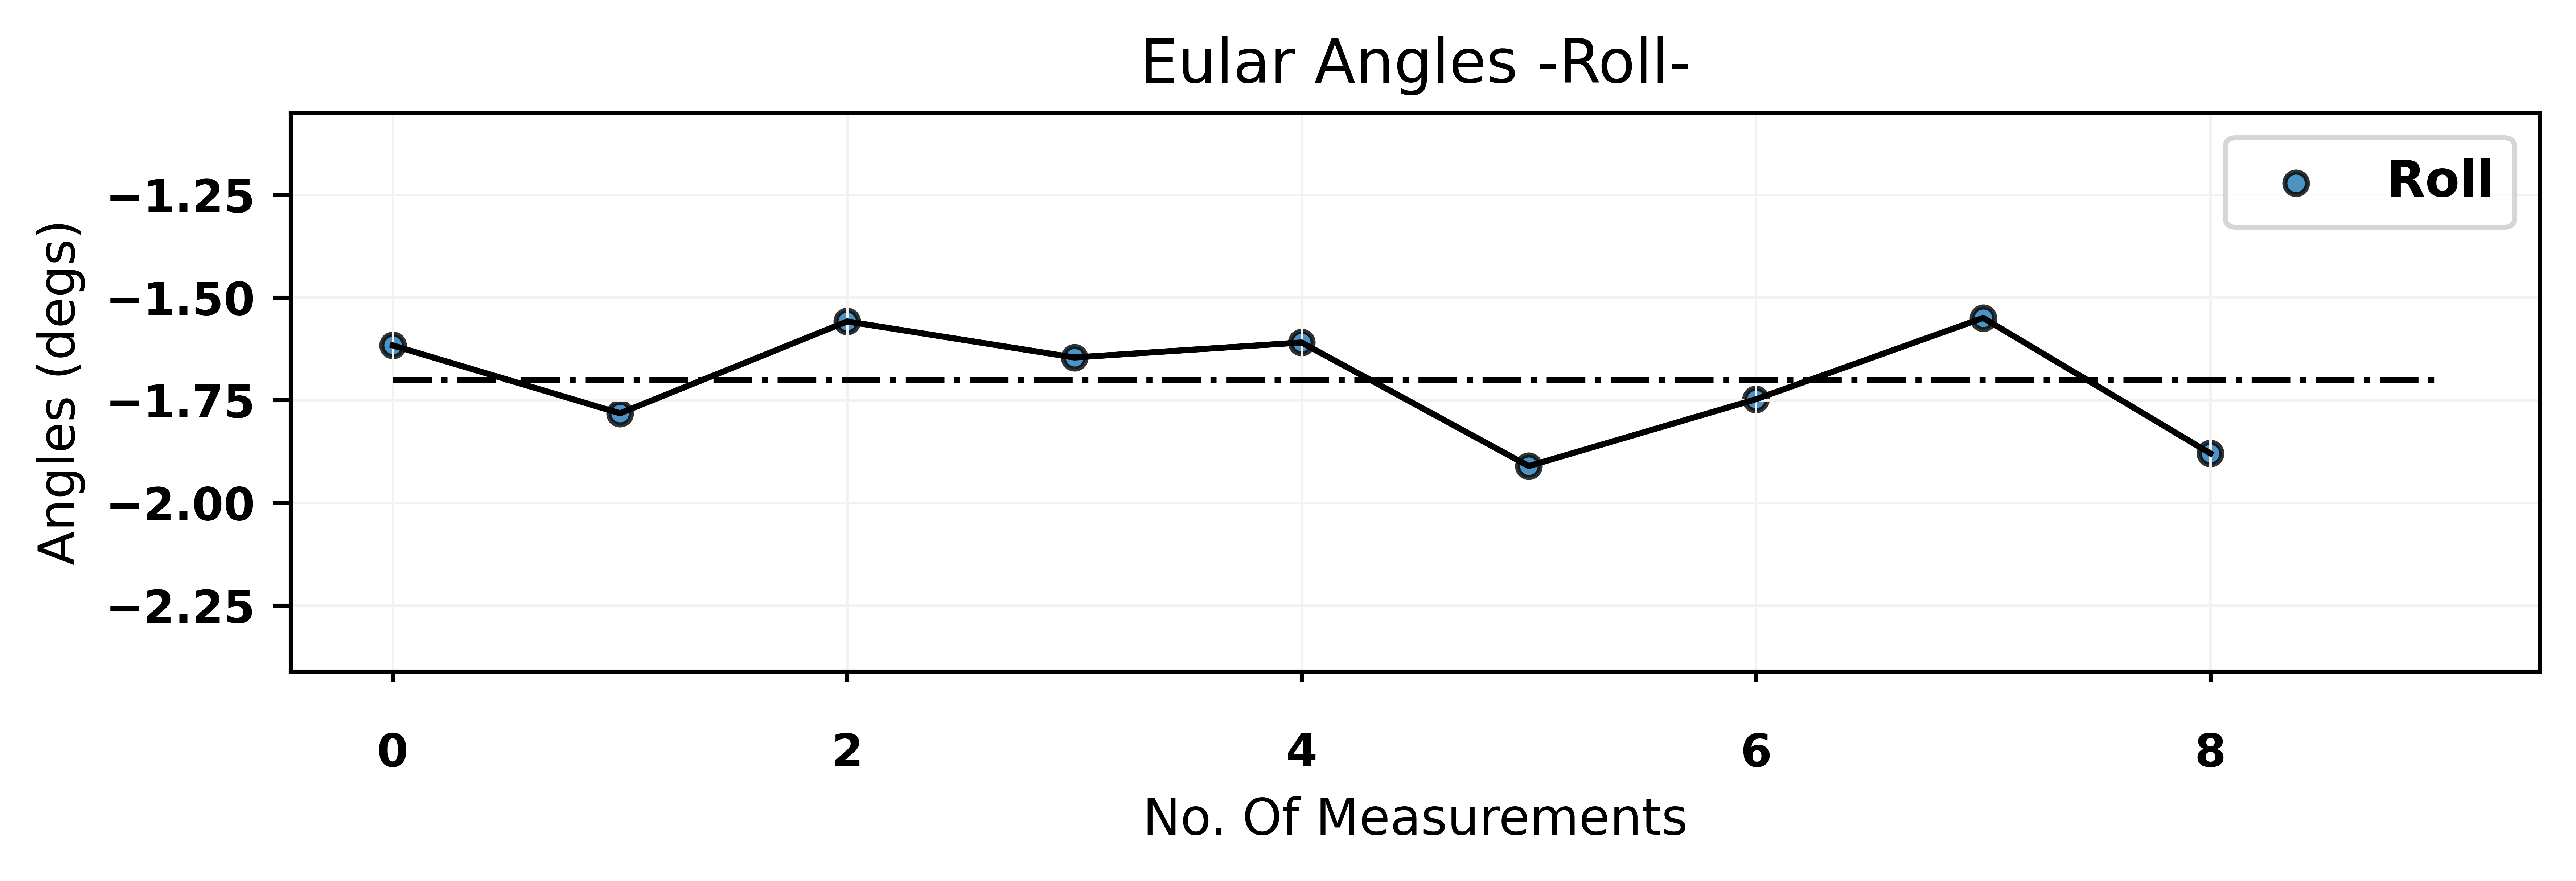

In [323]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})
x=rotAnglesDf.index 
y=rotAnglesDf['Roll']
y1=rotAnglesDf['Pitch']
y2=rotAnglesDf['Yaw']

plt.figure(figsize=(8,2),dpi=1000)

plt.title("Eular Angles -Roll-") # Title
plt.ylim(rotAnglesDf['Roll'].min()-0.5,rotAnglesDf['Roll'].max()+0.5) # Setting y limits
plt.scatter(x,y, s=20,marker="o",alpha=0.8,edgecolors='Black',label="Roll") # Plotting scatter

plt.hlines(y=rotAnglesDf['Roll'].mean(),xmin=0, xmax=9,colors='Black',linestyles='dashdot') # Mean
plt.plot(x, y,ls='-',c='Black')
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("Angles (degs)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.show()

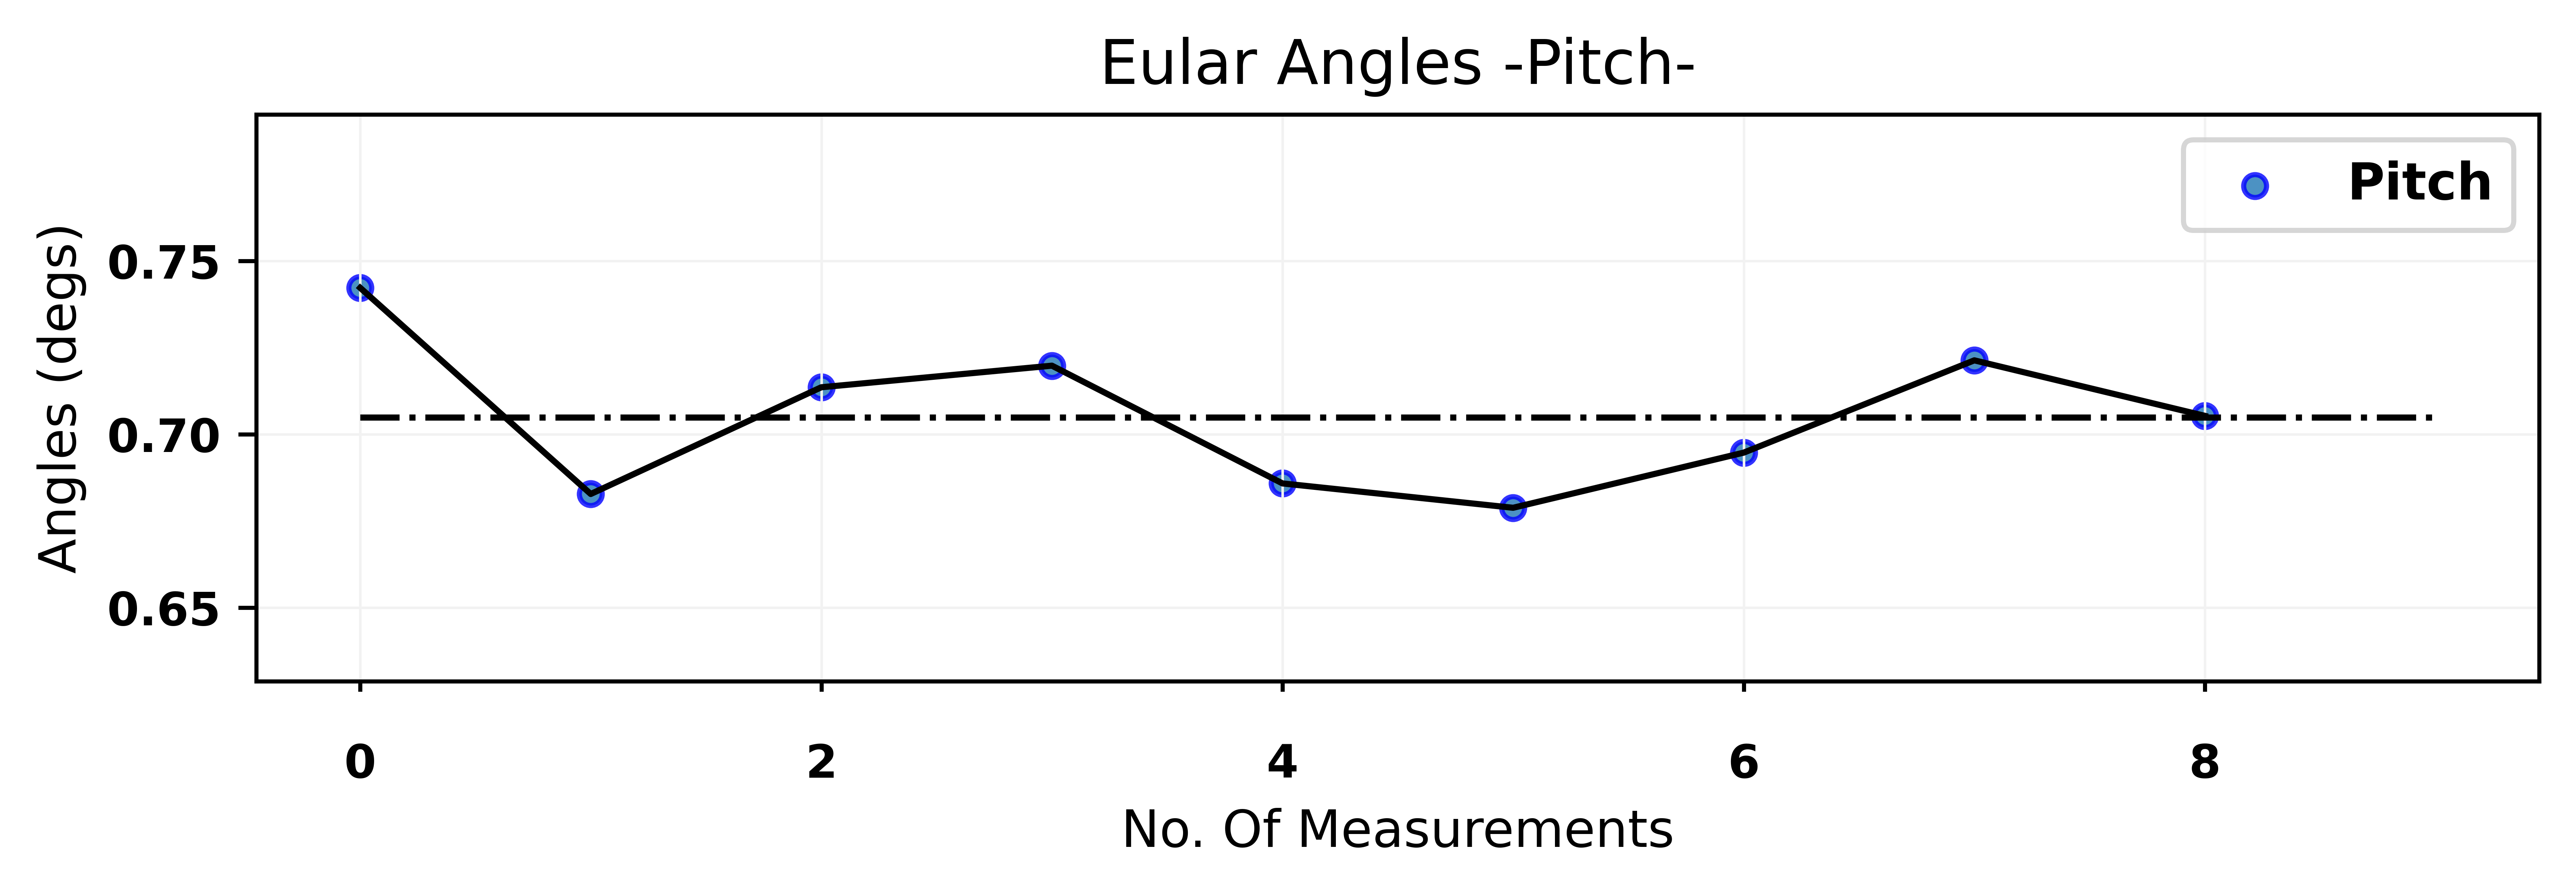

In [324]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})
x=rotAnglesDf.index 

y1=rotAnglesDf['Pitch']

plt.figure(figsize=(8,2),dpi=1000)

plt.title("Eular Angles -Pitch-") # Title
plt.ylim(rotAnglesDf['Pitch'].min()-0.05,rotAnglesDf['Pitch'].max()+ 0.05) # Setting y limits
plt.scatter(x, y1, s=20, marker="o", alpha=0.8, edgecolors='blue', label="Pitch")

plt.hlines(y=rotAnglesDf['Pitch'].mean(),xmin=0, xmax=9,colors='Black',linestyles='dashdot') # Mean
plt.plot(x, y1,ls='-',c='Black')
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("Angles (degs)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.show()

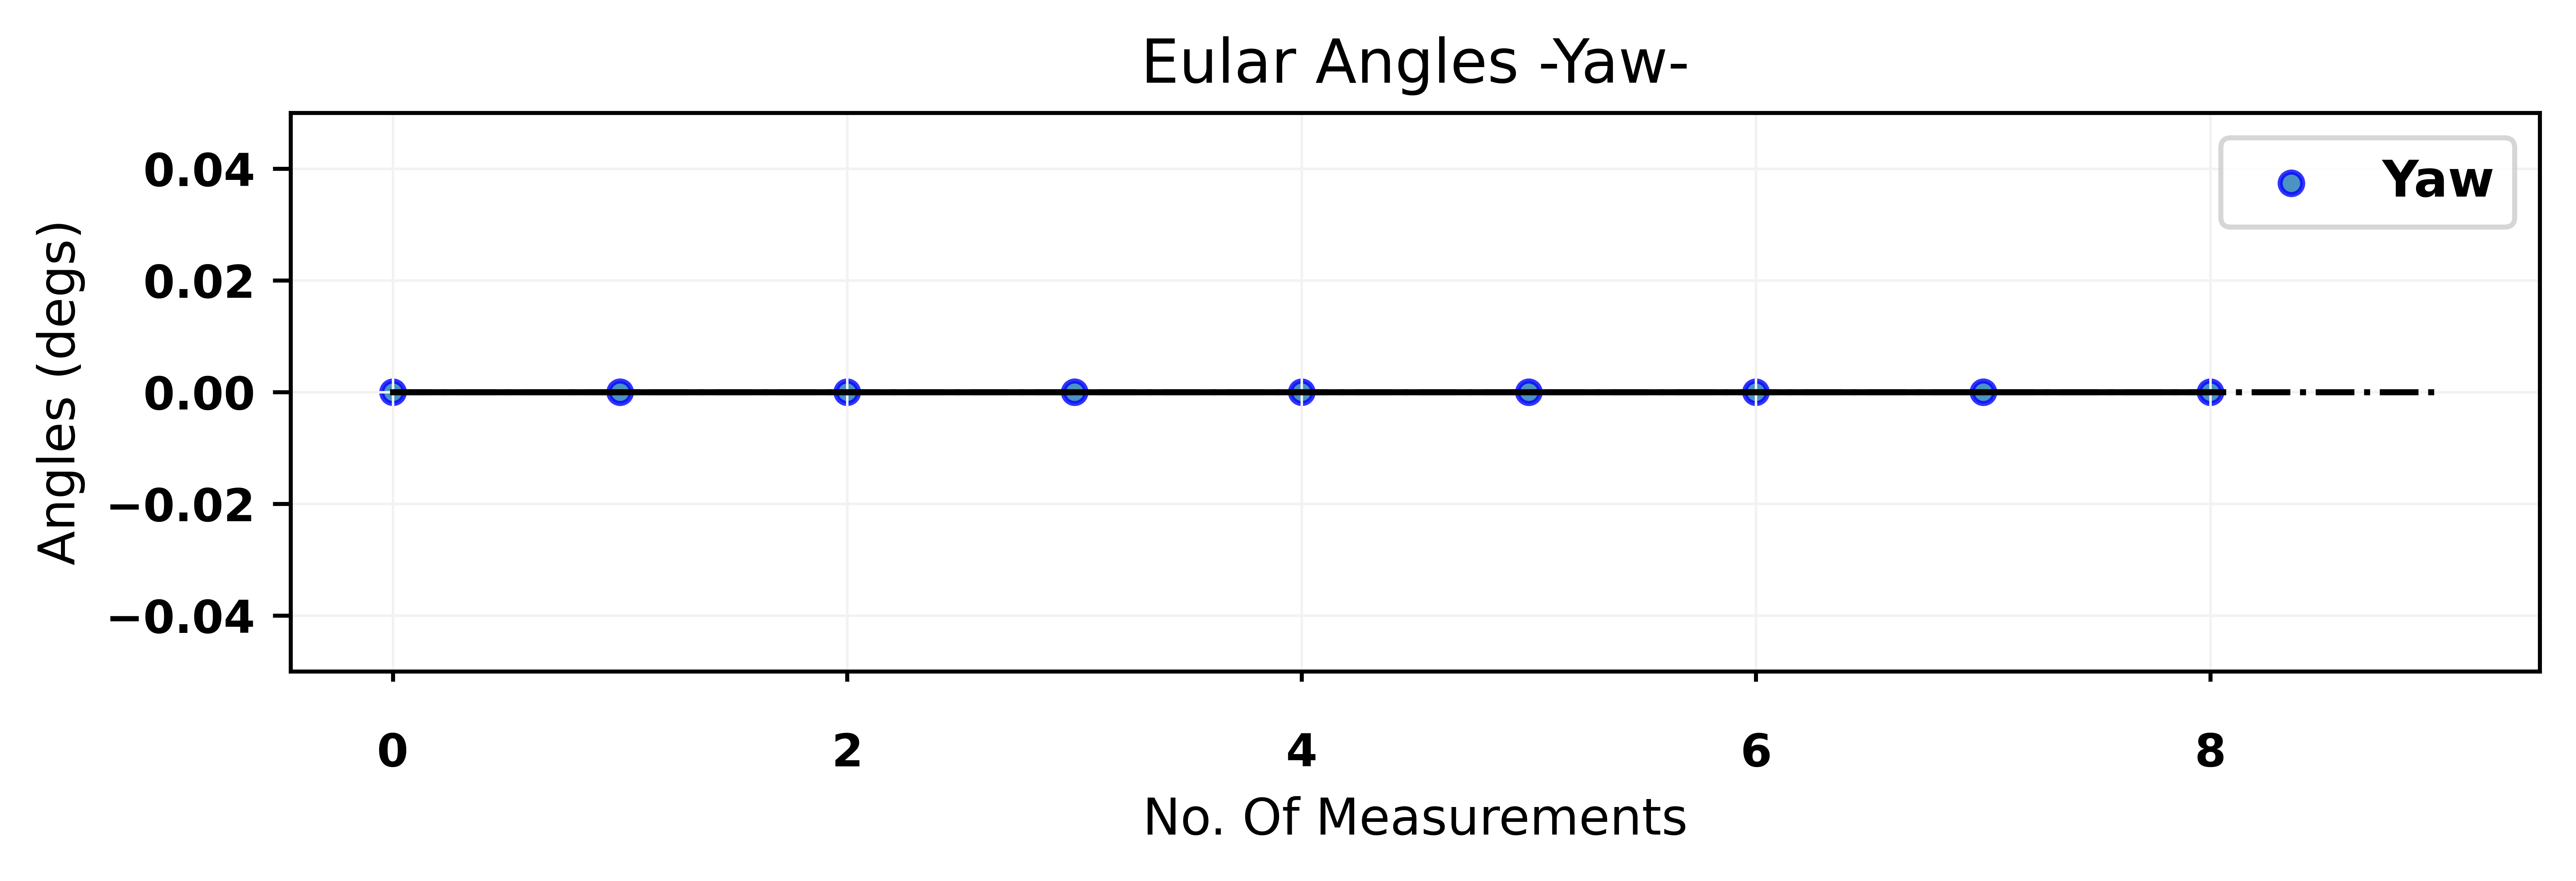

In [325]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
    
})
x=rotAnglesDf.index 

y2=rotAnglesDf['Yaw']

plt.figure(figsize=(8,2),dpi=1000)

plt.title("Eular Angles -Yaw-") # Title
plt.ylim(rotAnglesDf['Yaw'].min()-0.05,rotAnglesDf['Yaw'].max()+ 0.05) # Setting y limits
plt.scatter(x, y2, s=20, marker="o", alpha=0.8, edgecolors='blue', label="Yaw")

plt.hlines(y=rotAnglesDf['Yaw'].mean(),xmin=0, xmax=9,colors='Black',linestyles='dashdot') # Mean
plt.plot(x, y2,ls='-',c='Black')
plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("Angles (degs)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.show()

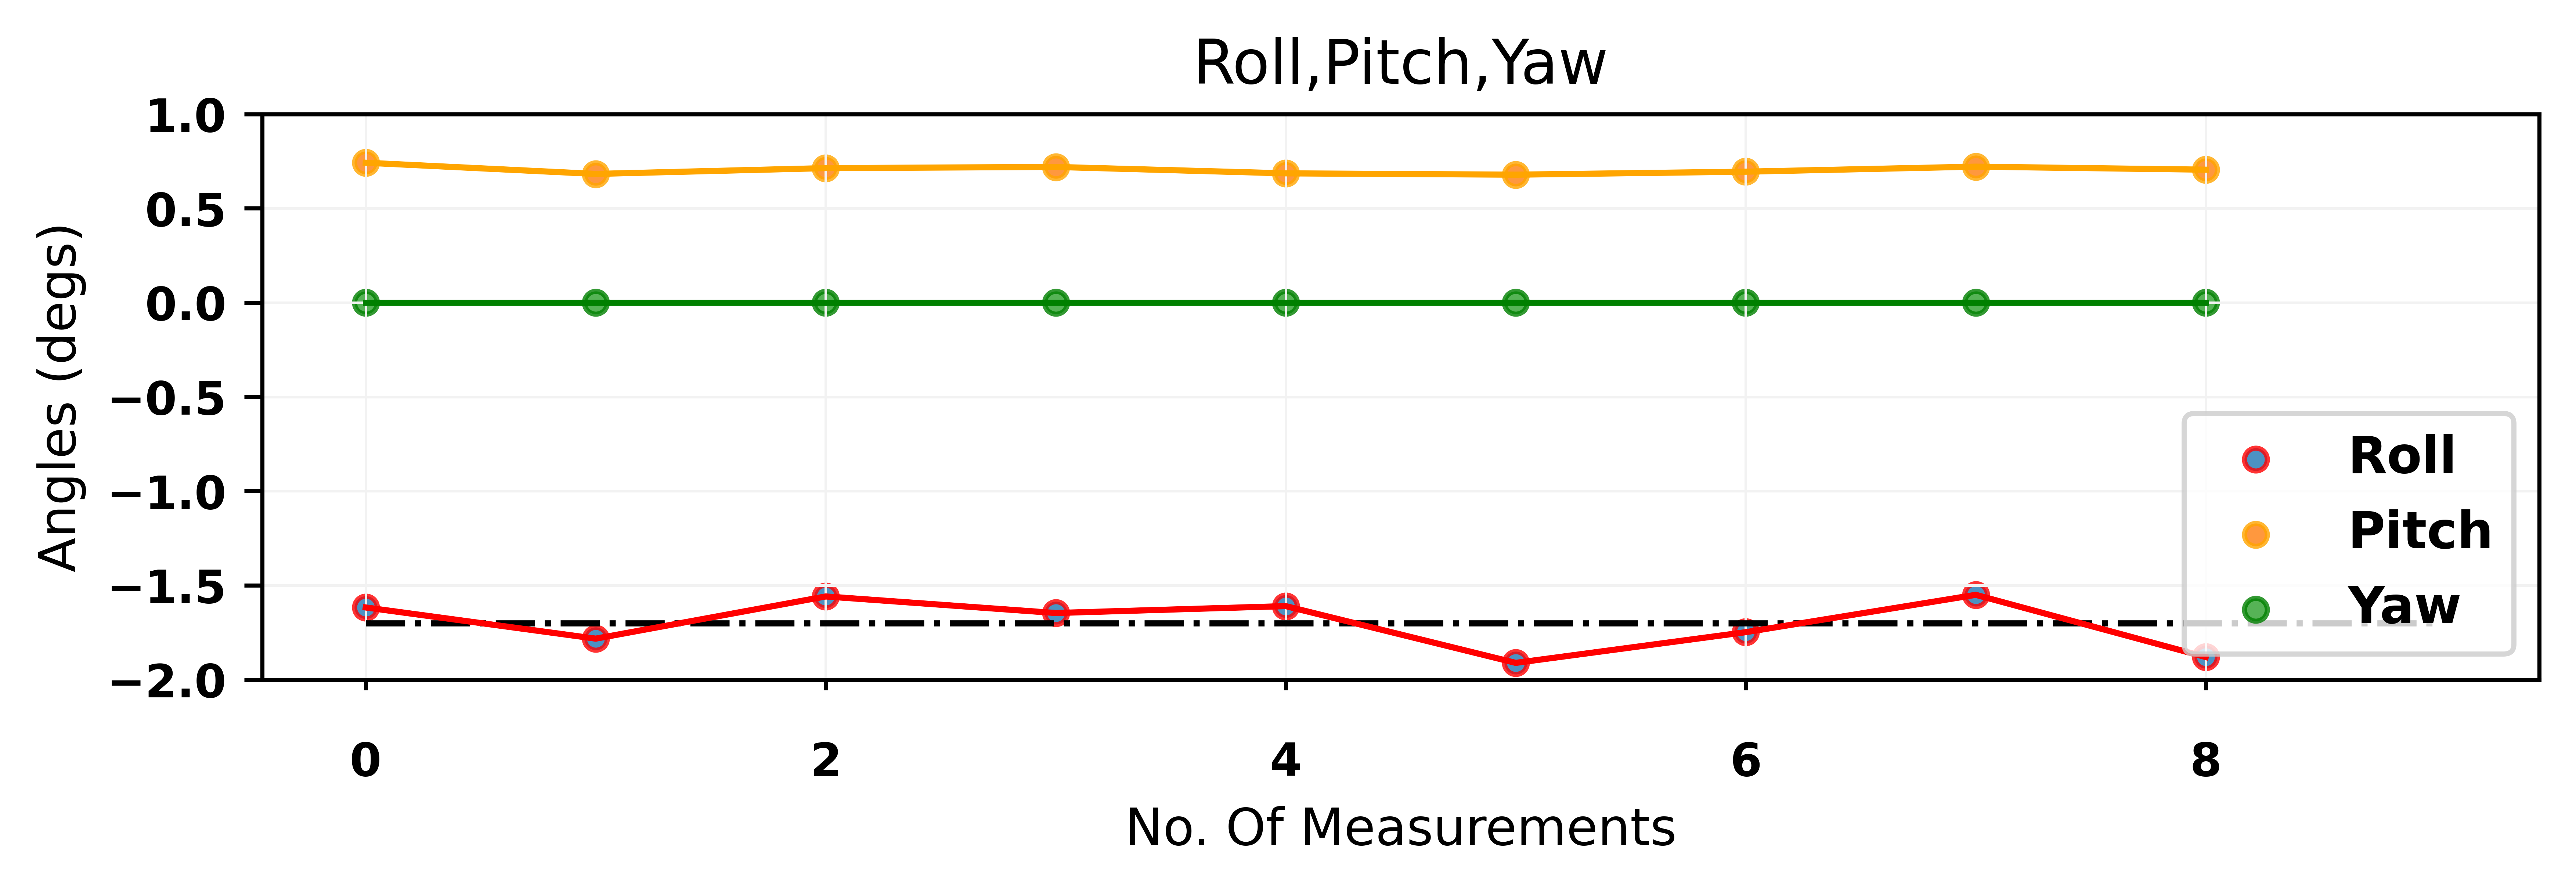

In [326]:
plt.rcParams.update({
    "font.weight": "bold",
    "xtick.major.size": 2,
    "xtick.major.pad": 10,
    "ytick.labelsize": 9,
    "xtick.labelsize": 9,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
    "lines.linewidth": 1.2,
    "lines.color": "g",
})

x = rotAnglesDf.index
y = rotAnglesDf['Roll']
y1 = rotAnglesDf['Pitch']
y2 = rotAnglesDf['Yaw']

plt.figure(figsize=(8, 2), dpi=1000)

plt.title("Roll,Pitch,Yaw")  # Title
plt.ylim(-2,1)  # Setting y limits

# Plotting scatter for Roll
plt.scatter(x, y, s=20, marker="o", alpha=0.8, edgecolors='Red', label="Roll")

# Plotting scatter for Pitch
plt.scatter(x, y1, s=20, marker="o", alpha=0.8, edgecolors='Orange', label="Pitch")

# Plotting scatter for Yaw
plt.scatter(x, y2, s=20, marker="o", alpha=0.8, edgecolors='Green', label="Yaw")

plt.hlines(y=rotAnglesDf['Roll'].mean(), xmin=0, xmax=9, colors='black', linestyles='dashdot')  # Mean

# Plotting line for Roll
plt.plot(x, y, ls='-', c='Red')

# Plotting line for Pitch
plt.plot(x, y1, ls='-', c='Orange')

# Plotting line for Yaw
plt.plot(x, y2, ls='-', c='Green')

plt.xlabel("No. Of Measurements", fontsize=10)
plt.ylabel("Angles (degs)", fontsize=10)
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.show()
